<a href="https://colab.research.google.com/github/kaisardauletbek/NeuralNetwork/blob/main/BuildingNeuralNet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import torch
import matplotlib.pyplot as plt

In [66]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

### **Training Data**

Text(0.5, 1.0, '$y=sin(x)$')

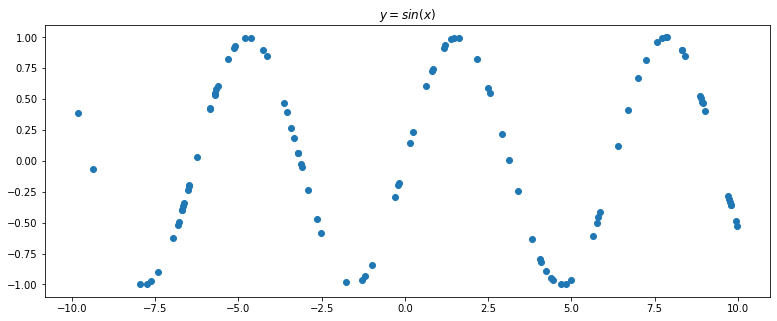

In [67]:
x_train = torch.rand(100)
x_train = x_train * 20 - 10

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o') 
plt.title("$y=sin(x)$")

Text(0.5, 1.0, 'Gaussian Noise')

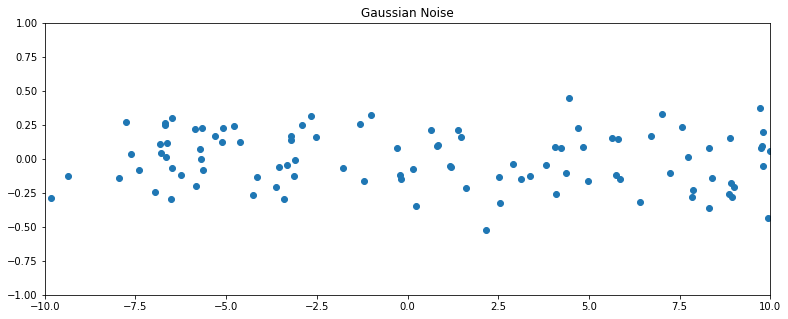

In [68]:
noise = torch.randn(y_train.shape) / 5

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title("Gaussian Noise")

Text(0, 0.5, 'y_train')

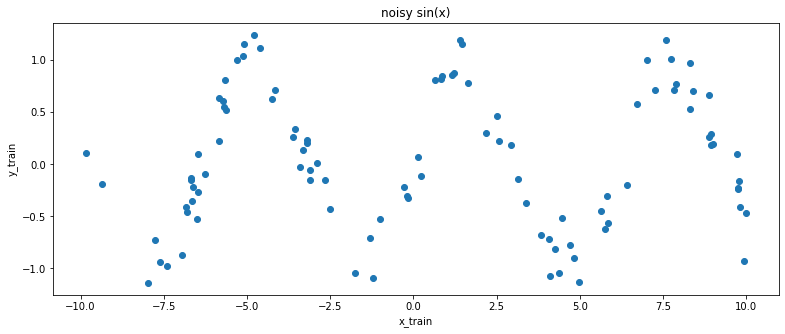

In [69]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o') 
plt.title("noisy sin(x)")
plt.xlabel("x_train")
plt.ylabel("y_train")

In [70]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)


tensor([[ 0.8774],
        [-0.9046],
        [-1.1357],
        [-0.4123],
        [ 0.5334],
        [-0.4136],
        [-0.8149],
        [-0.5281],
        [ 0.6103],
        [-0.3676],
        [-1.0959],
        [-0.2653],
        [ 0.5816],
        [ 1.1203],
        [ 0.2934],
        [-0.2228],
        [-0.4559],
        [ 0.0137],
        [-0.6804],
        [ 0.2669],
        [ 0.6624],
        [ 0.3066],
        [-0.2149],
        [ 0.1848],
        [ 1.1955],
        [ 1.1931],
        [ 0.6407],
        [ 0.1418],
        [ 0.1843],
        [-0.1562],
        [ 0.7198],
        [-1.0775],
        [-0.0878],
        [-0.6212],
        [-0.3086],
        [ 0.5476],
        [ 0.6321],
        [ 0.1050],
        [-0.1515],
        [ 0.8224],
        [-0.9359],
        [ 0.5246],
        [-0.1500],
        [ 0.2305],
        [-1.1321],
        [ 0.7172],
        [-0.4525],
        [ 1.2397],
        [ 0.8122],
        [ 0.2607],
        [-0.3062],
        [-0.2201],
        [ 1.

### **Validation**

Text(0, 0.5, 'y_validation')

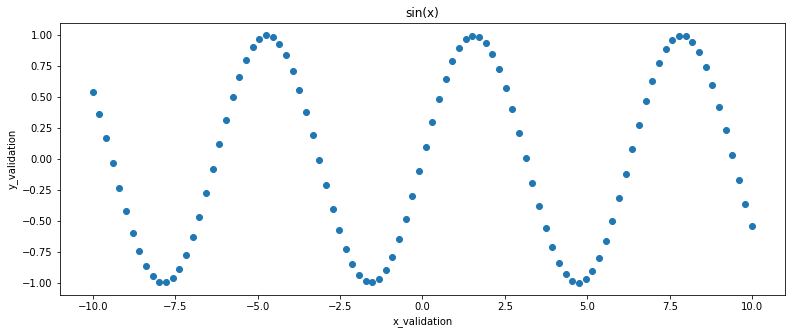

In [71]:
x_validation = torch.linspace(-10,10,100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title("sin(x)")
plt.xlabel("x_validation")
plt.ylabel("y_validation")

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

### **Model Construction**

In [114]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid() 
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return(x)

sine_net = SineNet(50)

### **Prediction**

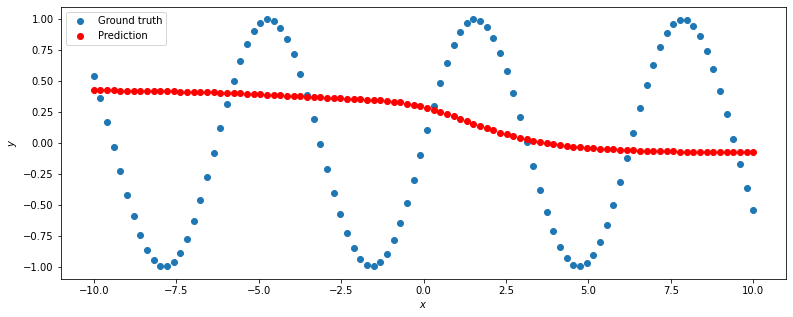

In [115]:
def predict(net, x, y):
  
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Ground truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

### **Optimizer**

In [116]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.01)

### **Loss Function**

In [117]:
def loss_MSE(pred, target):
  squares = (pred - target) ** 2
  return squares.mean()

### **Training Procedure**

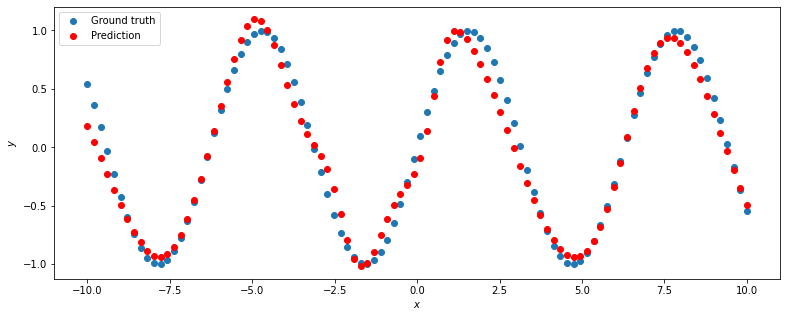

In [118]:
for epoch_index in range(2000):
  optimizer.zero_grad()

  y_pred = sine_net.forward(x_train)
  loss_val = loss_MSE(y_pred, y_train)

  loss_val.backward()

  optimizer.step()

predict(sine_net, x_validation, y_validation)